Scope of Project

Load and inspect dataset; check for completeness and tidiness; drop or fill missing values, engineer features as needed

Create lists containing feature data for easy access. Data also easily accessible via DataFrame or dictionary.

Calculate and present summary statistics for numerical features.

Define functions to calculate/present summary statistics.

Explore dependencies of the dependent variable on the independent variables using bar charts, violin plots, histograms, box plots, etc.

Explore relationships between various of the independent variables.


In [5]:
# Import modules. Manipulate data with pandas, plot with pyplot and seaborn, calculate statistics with numpy

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
# Load dataset
# import data from insurance_csv file; use standard name df for the DataFrame
df = pd.read_csv('C:\\Users\\ejwin\\OneDrive\\Documents\\Data_Analytics\\medical_insurance_data\\python-portfolio-project-starter-files\\insurance.csv')


In [3]:
# Inspect dataset
# Get basic information
print(df.head())
print(df.tail())
print(df.dtypes)
print(df.info())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
      age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 133

In [4]:
# define function to check for NaN in each column
def check_for_nan(data):
    for col in data.columns:
        num_nan = data[col].isnull().sum()
        num_records = len(data[col])
        print('Column:', col, 'Number of NaN:', num_nan, 'Number of records:', num_records, 'Fraction Nan:', num_nan/num_records)
    return

# call the function on our dataset
check_for_nan(df)


Column: age Number of NaN: 0 Number of records: 1338 Fraction Nan: 0.0
Column: sex Number of NaN: 0 Number of records: 1338 Fraction Nan: 0.0
Column: bmi Number of NaN: 0 Number of records: 1338 Fraction Nan: 0.0
Column: children Number of NaN: 0 Number of records: 1338 Fraction Nan: 0.0
Column: smoker Number of NaN: 0 Number of records: 1338 Fraction Nan: 0.0
Column: region Number of NaN: 0 Number of records: 1338 Fraction Nan: 0.0
Column: charges Number of NaN: 0 Number of records: 1338 Fraction Nan: 0.0


Brief inspection of the dataset shows that it has no missing records, is tidy and in long form. Existing columns suitable for analysis as-is. Let's try creating a new column of categorical data to represent the numerical data in the bmi column. We can bin the numerical bmi values into the following ranges: <18.5: Underweight, 18.5 – 24.9: Normal or Healthy Weight, 25.0 – 29.9: Overweight, >=30.0: Obese
(Range values taken from the CDC: https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html )

In [5]:
# define function to apply to bmi numbers
def bmi_range(bmi_value):
    if bmi_value <18.5:
        return 'Underweight'
    elif bmi_value < 25.0:
        return 'Normal'
    elif bmi_value < 30.0:
        return 'Overweight'
    else:
        return 'Obese'
    
# create new series, populating with bmi ranges
bmi_series = df['bmi'].apply(lambda x: bmi_range(x))
# make new column in DataFrame with this series, assign categorical dtype
df['bmi_category'] = pd.Series(pd.Categorical(bmi_series, categories=['Underweight', 'Normal', 'Overweight', 'Obese'], ordered=True))


# inspect DataFrame to see if new column is correct
print(df[['bmi', 'bmi_category']].head(10))
print(df.dtypes)
print(df.info())


      bmi bmi_category
0  27.900   Overweight
1  33.770        Obese
2  33.000        Obese
3  22.705       Normal
4  28.880   Overweight
5  25.740   Overweight
6  33.440        Obese
7  27.740   Overweight
8  29.830   Overweight
9  25.840   Overweight
age                int64
sex               object
bmi              float64
children           int64
smoker            object
region            object
charges          float64
bmi_category    category
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age             1338 non-null int64
sex             1338 non-null object
bmi             1338 non-null float64
children        1338 non-null int64
smoker          1338 non-null object
region          1338 non-null object
charges         1338 non-null float64
bmi_category    1338 non-null category
dtypes: category(1), float64(2), int64(2), object(3)
memory usage: 74.7+ KB
None


In [6]:
# Other ways to check for missing data: use .describe() and look at counts (only for numerical columns),
# or use .isnull().sum() on the DataFrame
print(df.describe())
print()
print(df.isnull().sum())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

age             0
sex             0
bmi             0
children        0
smoker          0
region          0
charges         0
bmi_category    0
dtype: int64


In [7]:
# define function to check for number of unique values in the text columns
def text_uniques(data):
    print('Number and list of unique values in categorical columns in the DataFrame')
    print()
    for col in data.columns:
        if data[col].dtype != 'int64' and data[col].dtype != 'float64':
            print('Column:', col)
            print('Number of unique values:', data[col].nunique())
            print('List of unique values:', data[col].unique())
            print('Value counts:')
            print(data[col].value_counts())
            print()
    return

# call the function on our dataset
text_uniques(df)


Number and list of unique values in categorical columns in the DataFrame

Column: sex
Number of unique values: 2
List of unique values: ['female' 'male']
Value counts:
male      676
female    662
Name: sex, dtype: int64

Column: smoker
Number of unique values: 2
List of unique values: ['yes' 'no']
Value counts:
no     1064
yes     274
Name: smoker, dtype: int64

Column: region
Number of unique values: 4
List of unique values: ['southwest' 'southeast' 'northwest' 'northeast']
Value counts:
southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

Column: bmi_category
Number of unique values: 4
List of unique values: [Overweight, Obese, Normal, Underweight]
Categories (4, object): [Underweight < Normal < Overweight < Obese]
Value counts:
Obese          707
Overweight     386
Normal         225
Underweight     20
Name: bmi_category, dtype: int64



The data now consists of eight features:
    * four quantitative: age, children (discrete); and bmi, charges (continuous)
    * four categorical: sex, smoker (binary); and region, bmi_category
We can see from the value counts of the categorical features that records are approximately evenly distributed between male and female, and between the four regions; for smoker, we see that there are about four times as many non-smokers as smokers. bmi_category shows more than half of the records are in the 'Obese' category, followed in frequency by 'Overweight', 'Normal', and a very few (20/1338 = 1.5%) 'Underweight'.

In [8]:
# Cast values to individual lists for simple manipulation.
# identify feature names: these are the column headings from the DataFrame
print(df.columns)

# create empty lists
age = []
sex = []
bmi = []
children = []
smoker = []
region = []
charges = []
bmi_category = []

# iterate to populate lists
for record in df['sex']:
    sex.append(record)
for record in df['bmi']:
    bmi.append(record)
for record in df['children']:
    children.append(record)
for record in df['smoker']:
    smoker.append(record)
for record in df['region']:
    region.append(record)
for record in df['age']:
    age.append(record) 
for record in df['charges']:
    charges.append(record)
for record in df['bmi_category']:
    bmi_category.append(record)

# test that lists contain correct information
print(age[:5])
print(sex[:5])
print(bmi[:5])
print(children[:5])
print(smoker[:5])
print(region[:5])
print(charges[:5])
print(bmi_category[:5])
        

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'bmi_category'],
      dtype='object')
[19, 18, 28, 33, 32]
['female', 'male', 'male', 'male', 'male']
[27.9, 33.77, 33.0, 22.705, 28.88]
[0, 1, 3, 0, 0]
['yes', 'no', 'no', 'no', 'no']
['southwest', 'southeast', 'southeast', 'northwest', 'northwest']
[16884.924, 1725.5523, 4449.462, 21984.47061, 3866.8552]
['Overweight', 'Obese', 'Obese', 'Normal', 'Overweight']


In [9]:
# create a dictionary containing the dataset. This will make it easy to access the data and the column labels.
# create the dictionary using a dictionary comprehension

data_dict = {label: df[label] for label in df.columns}

# can we do this in an an even simpler way? try just enforcing dict data type on the DataFrame
test_dict = dict(df)
print(type(df))
print(type(test_dict))
print(type(data_dict))

<class 'pandas.core.frame.DataFrame'>
<class 'dict'>
<class 'dict'>


In [10]:
# define functions to provide summary statistics of the quantitative columns

# first define a function for summary statistics using a DataFrame as input
def df_summary_stats(data):
    for col in data.columns:
        if data[col].dtype == 'int64' or data[col].dtype == 'float':
            average = data[col].mean()
            std_dev = data[col].std()
            print('Column:', str(col))
            print('Mean:', round(average, 2))
            print('Median:', round(data[col].median(), 2))
            print('Standard deviation:', round(std_dev, 2))
            print('Relative standard deviation (%):', round(std_dev/average * 100, 1))
            print('Maximum:', round(data[col].max(), 2))
            print('Minimum:', round(data[col].min(), 2))
            print()
            
# test the function with a call
df_summary_stats(df)

# next, define a similar function that uses the dictionary
def dict_summary_stats(data):
    for key in data.keys():
        if data[key].dtype == 'int64' or data[key].dtype == 'float':
            average = data[key].mean()
            std_dev = data[key].std()
            print('Column:', str(key))
            print('Mean:', round(average, 2))
            print('Median:', round(data[key].median(), 2))
            print('Standard deviation:', round(std_dev, 2))
            print('Relative standard deviation (%):', round(std_dev/average * 100, 1))
            print('Maximum:', round(data[key].max(), 2))
            print('Minimum:', round(data[key].min(), 2))
            print()


# test dictionary call
dict_summary_stats(data_dict)

Column: age
Mean: 39.21
Median: 39.0
Standard deviation: 14.05
Relative standard deviation (%): 35.8
Maximum: 64
Minimum: 18

Column: bmi
Mean: 30.66
Median: 30.4
Standard deviation: 6.1
Relative standard deviation (%): 19.9
Maximum: 53.13
Minimum: 15.96

Column: children
Mean: 1.09
Median: 1.0
Standard deviation: 1.21
Relative standard deviation (%): 110.1
Maximum: 5
Minimum: 0

Column: charges
Mean: 13270.42
Median: 9382.03
Standard deviation: 12110.01
Relative standard deviation (%): 91.3
Maximum: 63770.43
Minimum: 1121.87

Column: age
Mean: 39.21
Median: 39.0
Standard deviation: 14.05
Relative standard deviation (%): 35.8
Maximum: 64
Minimum: 18

Column: bmi
Mean: 30.66
Median: 30.4
Standard deviation: 6.1
Relative standard deviation (%): 19.9
Maximum: 53.13
Minimum: 15.96

Column: children
Mean: 1.09
Median: 1.0
Standard deviation: 1.21
Relative standard deviation (%): 110.1
Maximum: 5
Minimum: 0

Column: charges
Mean: 13270.42
Median: 9382.03
Standard deviation: 12110.01
Relative

We've created simple functions that will operate on a dataset stored as a DataFrame or a dictionary to calculate and present summary statistics for numerical features.

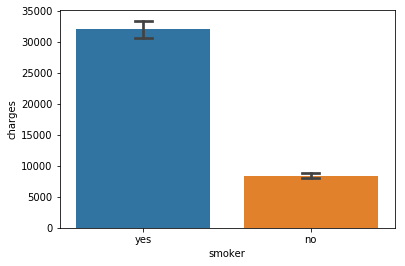

<Figure size 432x288 with 0 Axes>

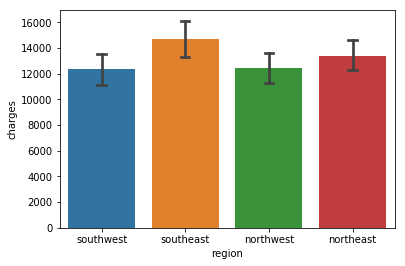

<Figure size 432x288 with 0 Axes>

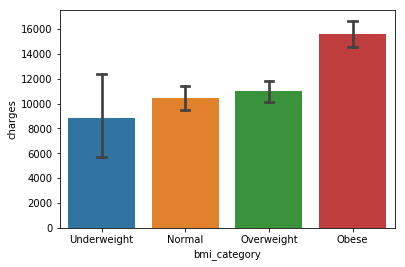

<Figure size 432x288 with 0 Axes>

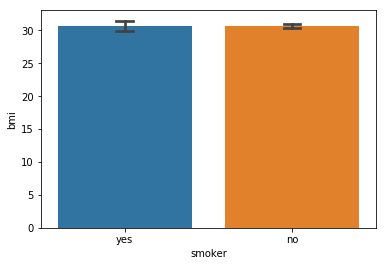

<Figure size 432x288 with 0 Axes>

In [11]:
# define function to prepare bar chart; numerical variable by categorical variable, e.g. bmi by region
def make_bar_plot(data, x_variable, y_variable):
    plt.figure()
    sns.barplot(data=data, x=x_variable, y=y_variable, capsize=0.1)
    plt.show()
    plt.clf()
    return

# Plot charges as a function of smoker
make_bar_plot(data_dict, 'smoker', 'charges')

# plot charges as a function of region
make_bar_plot(data_dict, 'region', 'charges')

# plot charges as a function of bmi_category
make_bar_plot(data_dict, 'bmi_category', 'charges')

# plot bmi as a function of smoker
make_bar_plot(data_dict, 'smoker', 'bmi')

The function make_bar_plot allows for simple creation of bar plots. More complicated plots, involving for example a third variable, must be made outside the function.

The bar plot of insurance cost (charges) vs. smoking status (smoker) reveals an enormous difference between the health insurance costs associated with smokers vs. non-smokers: smokers have costs on average around \\$32,000, compared to less than \\$10,000 for non-smokers.

Charges as a function of region shows similar average charges by region, with charges in the Southeast a bit higher than other regions.

BMI as a function of smoking status shows that smokers and non-smokers in the dataset have very similar average BMIs.

Charges as a function of bmi_category shows a trend of higher bmi individuals having higher charges.

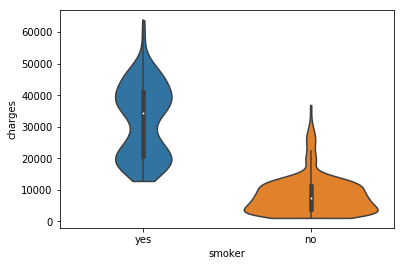

<Figure size 432x288 with 0 Axes>

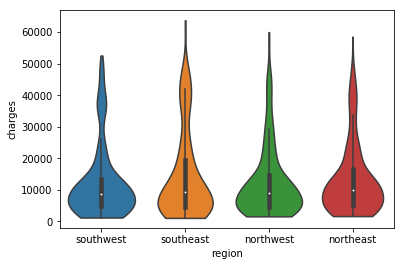

<Figure size 432x288 with 0 Axes>

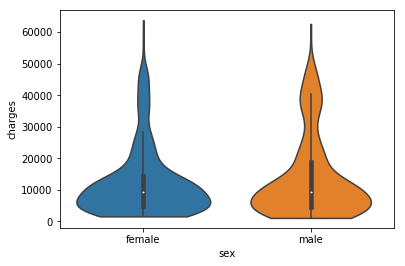

<Figure size 432x288 with 0 Axes>

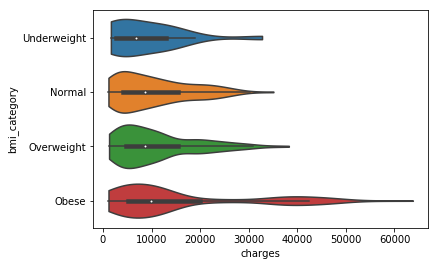

<Figure size 432x288 with 0 Axes>

In [12]:
# define function to prepare violin plot; numerical variable by categorical variable, e.g. charges by smoker
def make_violinplot(data, x_variable, y_variable):
    plt.figure()
    sns.violinplot(data=data, x=x_variable, y=y_variable, cut=0)
    plt.show()
    plt.clf()
    return
# prepare violin plot for charges by smoker
make_violinplot(data_dict, 'smoker', 'charges')

make_violinplot(data_dict, 'region', 'charges')

make_violinplot(data_dict, 'sex', 'charges')

make_violinplot(data_dict, 'charges', 'bmi_category')

The violin plot of insurance cost (charges) vs. smoking status (smoker) reveals with more detail the enormous difference between charges for smokers and non-smokers. Interestingly, the smokers appear to have a bimodal distribution of charges, with their charges clustering around about \\$40,000 and \\$20,000. Charges for non-smokers are largely unimodal, with a mode around $5,000 and a right skew.

Comparing charges across regions, we see similar distributions for all four regions, but with the southeast a bit higher. The distributions are more-or-less unimodal with a right skew.

Men and women have similar charges, though women have a tighter distribution around the median (note the smaller interquartile range for women). Again, the distributions are approximately unimodal with a right skew. The skew is stronger for men than for women.

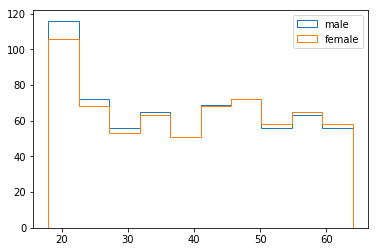

<Figure size 432x288 with 0 Axes>

In [30]:
# prepare histogram of the ages of the people in the dataset
plt.figure()
plt.hist(df.age[df.sex=='male'], histtype='step', label='male')
plt.hist(df.age[df.sex=='female'], histtype='step', label='female')
plt.legend()
plt.show()
plt.clf()


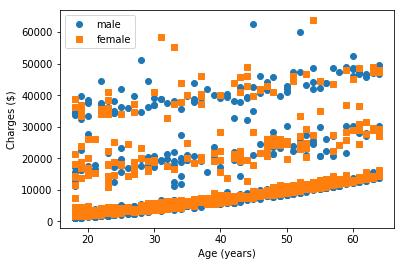

<Figure size 432x288 with 0 Axes>

In [14]:
# plot charges as a function of age, by sex
plt.figure()
plt.plot(df['age'][df.sex=='male'], df['charges'][df.sex=='male'], linestyle='', marker='o', label='male')
plt.plot(df['age'][df.sex=='female'], df['charges'][df.sex=='female'], linestyle='', marker='s', label='female')
plt.xlabel('Age (years)')
plt.ylabel('Charges ($)')
plt.legend()
plt.show()
plt.clf()

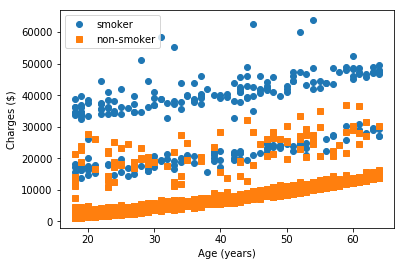

<Figure size 432x288 with 0 Axes>

In [15]:
# plot charges as a function of age, by smoker
plt.figure()
plt.plot(df['age'][df.smoker=='yes'], df['charges'][df.smoker=='yes'], linestyle='', marker='o', label='smoker')
plt.plot(df['age'][df.smoker=='no'], df['charges'][df.smoker=='no'], linestyle='', marker='s', label='non-smoker')
plt.xlabel('Age (years)')
plt.ylabel('Charges ($)')
plt.legend()
plt.show()
plt.clf()

Plotting charges by age, but broken down by smoking status, is more instructive. There is still a gradual increase in charges with age, but charges at every age tend to be much lower for non-smokers than for smokers.

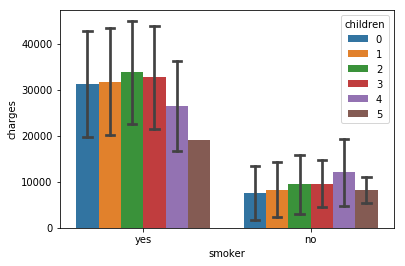

0    115
1     61
2     55
3     39
4      3
5      1
Name: children, dtype: int64
0    459
1    263
2    185
3    118
4     22
5     17
Name: children, dtype: int64


<Figure size 432x288 with 0 Axes>

In [16]:
# plot barplot of charges by smoking status, broken down by number of children
plt.figure()
sns.barplot(data=df, x='smoker', y='charges', hue='children', ci='sd', capsize=0.05)
plt.show()
plt.clf()

# how many records are we looking at in each category here ?
print(df.children[df.smoker=='yes'].value_counts())
print(df.children[df.smoker=='no'].value_counts())

Again, we very clearly see higher charges for smokers vs. non-smokers. For smokers, charges are steady with increasing number of children but ultimately drop off with higher numbers of children. However, there are very few records for smokers with a large number of children in the dataset (3 records for smokers with 4 children, 1 record for smokers with 5 children) so the observed trend likely represents insufficient data.

For non-smokers, charges show only small variation with number of children.

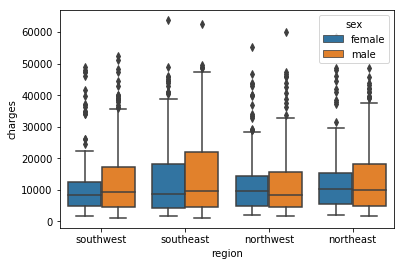

<Figure size 432x288 with 0 Axes>

In [17]:
# plot boxplot of charges by region, broken down by sex
plt.figure()
sns.boxplot(data=df, x='region', y='charges', hue='sex')
plt.show()
plt.clf()

Charges look substantially the same across regions, though the southeast has somewhat higher charges.

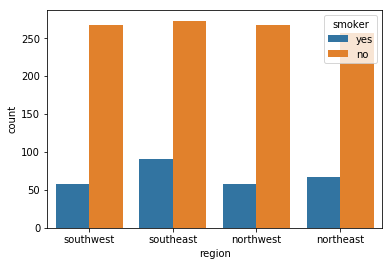

<Figure size 432x288 with 0 Axes>

In [18]:
# prepare plot showing smoking status by region
plt.figure()
sns.countplot(data=df, x='region', hue='smoker')
plt.show()
plt.clf()

The southeast region shows a higher proportion of smokers than the other regions. This likely accounts for the slightly higher costs we have already observed in the southeast.

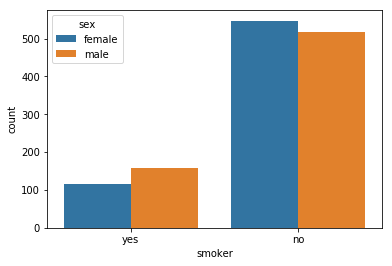

<Figure size 432x288 with 0 Axes>

In [19]:
# prepare countplot of smoking status broken down by sex
plt.figure()
sns.countplot(data=df, x='smoker', hue='sex')
plt.show()
plt.clf()

Men are a little more likely to be smokers than women.

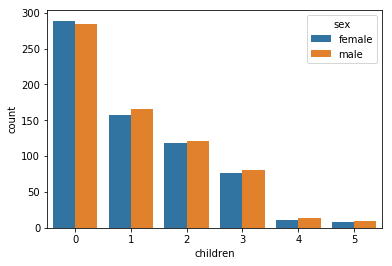

<Figure size 432x288 with 0 Axes>

In [20]:
# prepare countplot of respondents with different numbers of children, broken down by sex
plt.figure()
sns.countplot(data=df, x='children', hue='sex')
plt.show()
plt.clf()

People with no children are the most populous group in the dataset. Number of respondents decreases with increasing number of children. Men and women are fairly equally represented.

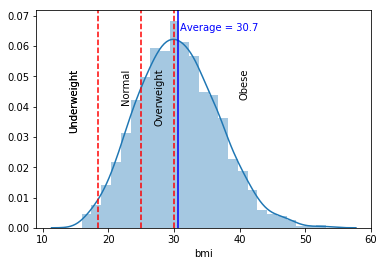

bmi average:
30.7


<Figure size 432x288 with 0 Axes>

In [55]:
# prepare distribution plot of bmi for the dataset
plt.figure()
sns.distplot(df.bmi)
plt.axvline(18.5,0,1, linestyle='--', color='red')
plt.axvline(25,0,1, linestyle='--', color='red')
plt.axvline(30,0,1, linestyle='--', color='red')
plt.text(14,0.05,'Underweight', rotation='vertical')
plt.text(22,0.05,'Normal', rotation='vertical')
plt.text(27,0.05,'Overweight', rotation='vertical')
plt.text(14,0.05,'Underweight', rotation='vertical')
plt.text(40,0.05,'Obese', rotation='vertical')
plt.axvline(30.7,0,1, linestyle='-', color='blue')
plt.text(31,0.065,'Average = 30.7', rotation='horizontal', color='blue')


plt.show()
plt.clf()

print('bmi average:')
print(round(df.bmi.mean(), 1))

bmi shows a reasonably normal distribution. The average bmi of the dataset falls in the "Obese" category at 30.7.

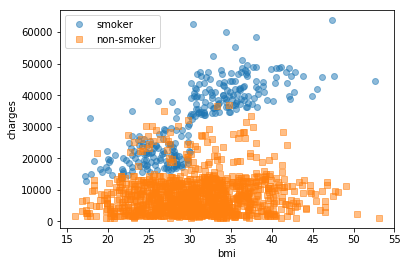

<Figure size 432x288 with 0 Axes>

In [36]:
plt.figure()
plt.plot(df.bmi[df.smoker=='yes'], df.charges[df.smoker=='yes'], linestyle='', marker='o', label='smoker', alpha=0.5)
plt.plot(df.bmi[df.smoker=='no'], df.charges[df.smoker=='no'], linestyle='', marker='s', label='non-smoker', alpha=0.5)
plt.xlabel('bmi')
plt.ylabel('charges')
plt.legend()
plt.show()
plt.clf()

Plotting charges vs. bmi for smokers and non-smokers reveals an increase of charges with increasing bmi for smokers, but little change in charges with increasing bmi for non-smokers.